<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [2]:
tica_mdl =load("tica_mdl_rawpos.pkl")

In [3]:
tica_mdl

tICA(commute_mapping=False, kinetic_mapping=False, lag_time=100, n_components=5,
     shrinkage=None)

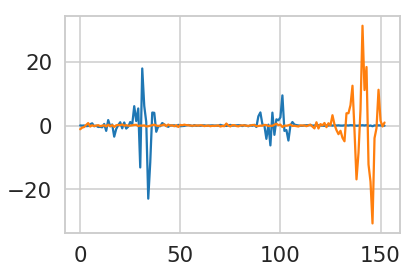

In [4]:
plot(tica_mdl.components_[0])
plot(tica_mdl.components_[1])

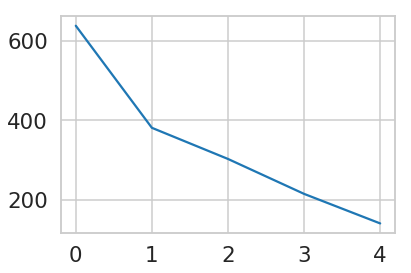

In [5]:
plot(tica_mdl.timescales_)

In [3]:
tica_data = load("tica_fit_rawpos.pkl")

In [5]:
import torch
from vde import VDE

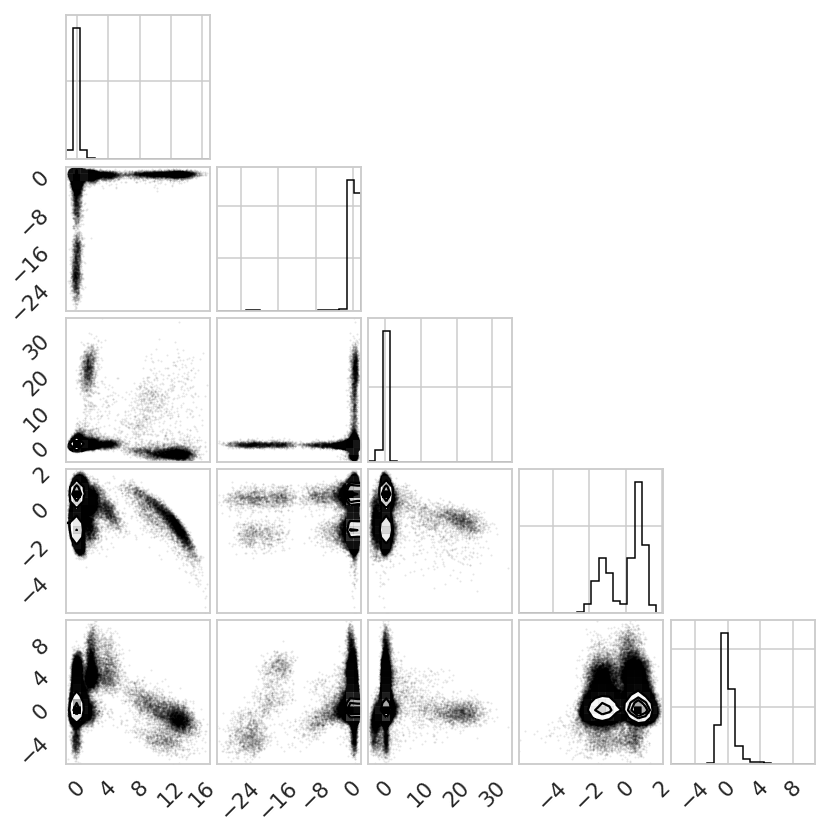

In [14]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_data)
_ = msme.plot_histogram(txx)

In [22]:
model = VDE(2,lag_time=25,hidden_layer_depth=2,hidden_size=20,n_epochs=100,batch_size=500,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_data)
torch.save(model,"trained_bpti.pkl")

Epoch: 0
Batch 100, loss = 1.1401
rec_loss = 1.1225, autocorr_loss = 0.0176
Epoch: 1
Batch 100, loss = 0.9987
rec_loss = 0.9730, autocorr_loss = 0.0257
Epoch: 2
Batch 100, loss = 0.6906
rec_loss = 0.6339, autocorr_loss = 0.0568
Epoch: 3
Batch 100, loss = 0.7148
rec_loss = 0.6877, autocorr_loss = 0.0271
Epoch: 4
Batch 100, loss = 0.6381
rec_loss = 0.6333, autocorr_loss = 0.0048
Epoch: 5
Batch 100, loss = 0.5793
rec_loss = 0.4981, autocorr_loss = 0.0812
Epoch: 6
Batch 100, loss = 1.2584
rec_loss = 0.6384, autocorr_loss = 0.6200
Epoch: 7
Batch 100, loss = 0.6830
rec_loss = 0.6468, autocorr_loss = 0.0362
Epoch: 8
Batch 100, loss = 0.5749
rec_loss = 0.5024, autocorr_loss = 0.0725
Epoch: 9
Batch 100, loss = 0.6074
rec_loss = 0.5590, autocorr_loss = 0.0484
Epoch: 10
Batch 100, loss = 0.8417
rec_loss = 0.3723, autocorr_loss = 0.4695
Epoch: 11
Batch 100, loss = 0.5045
rec_loss = 0.4958, autocorr_loss = 0.0087
Epoch: 12
Batch 100, loss = 0.8547
rec_loss = 0.4622, autocorr_loss = 0.3925
Epoch: 13

In [23]:
model = torch.load("trained_bpti.pkl")

In [24]:
from torch.autograd import Variable

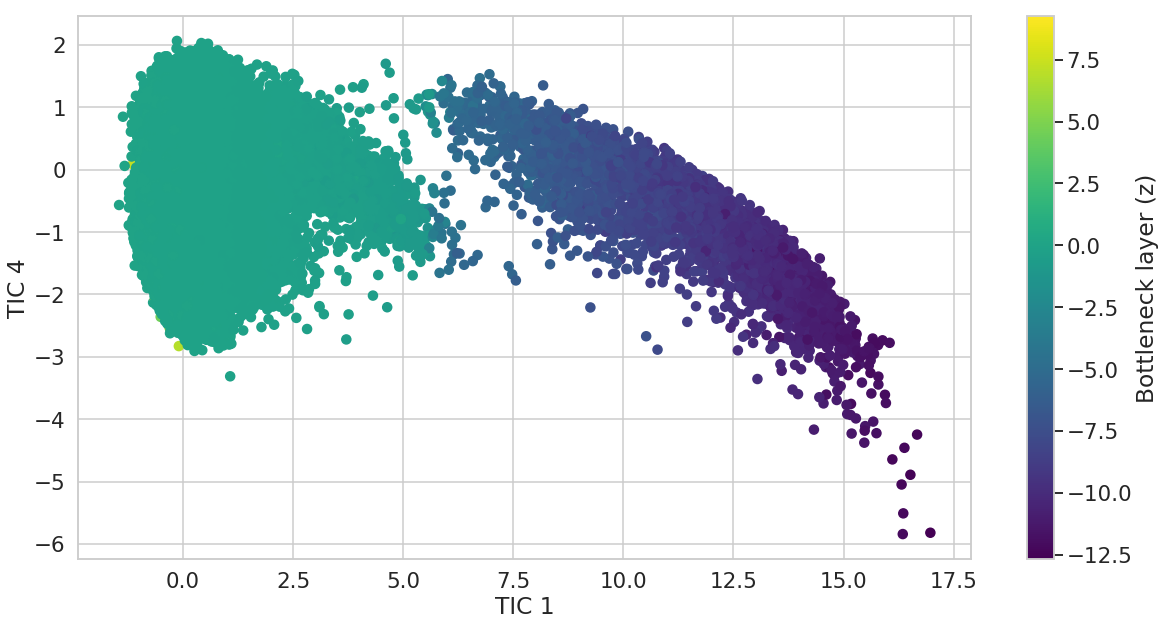

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,3],c=np.squeeze(output),cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 4")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

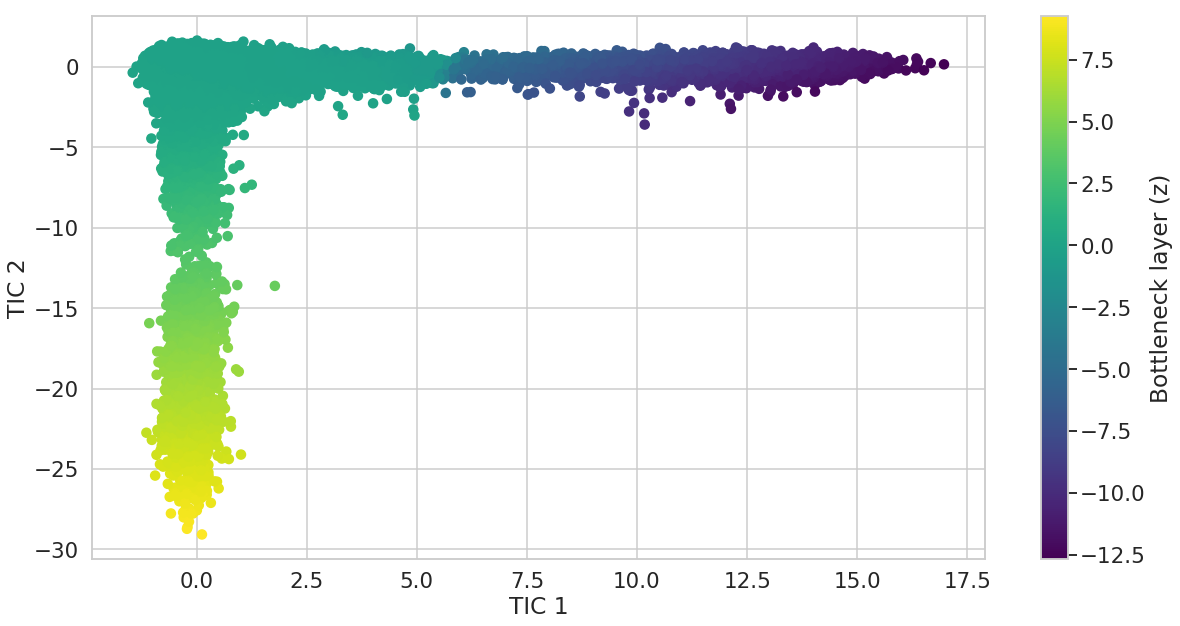

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

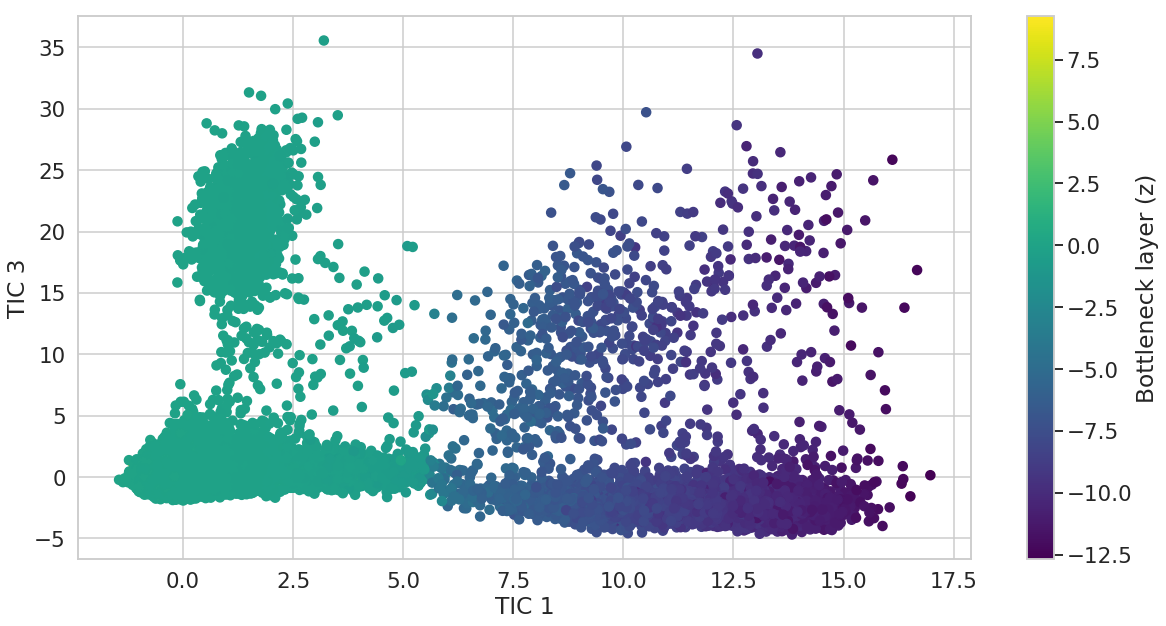

In [32]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
p=scatter(txx[:,0],txx[:,2],c=np.squeeze(output),cmap='viridis')
xlabel("TIC 1")
ylabel("TIC 3")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

Text(0, 0.5, 'Free Energy')

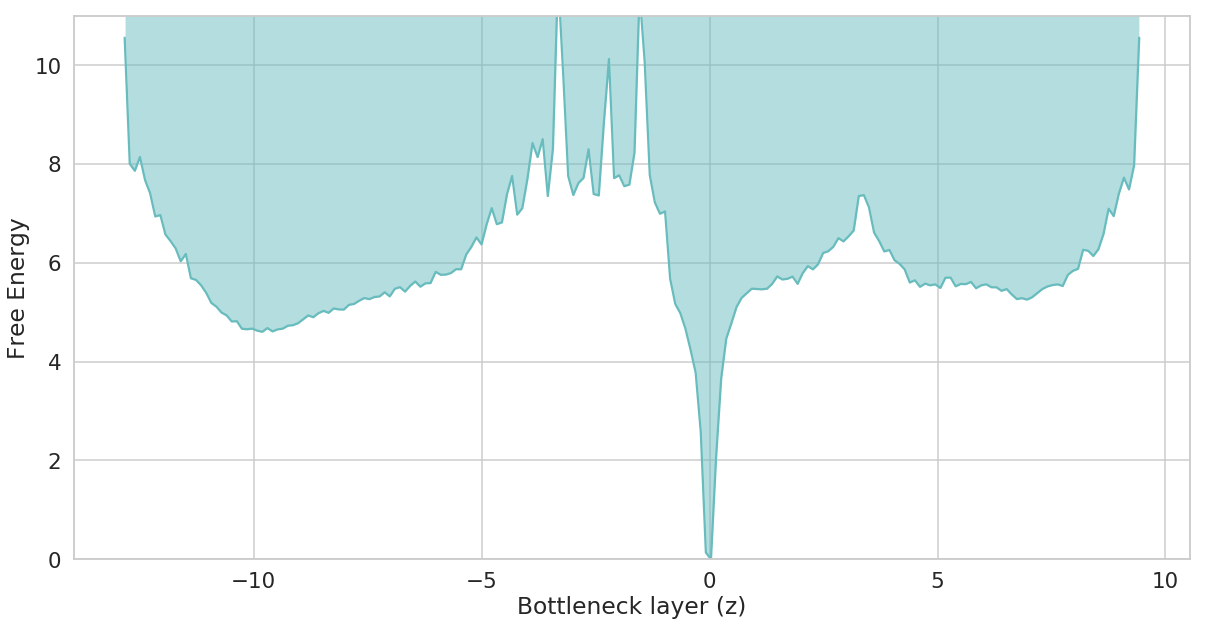

In [28]:
msme.plot_free_energy(output,gridsize=200)
ylim([0,11])
xlabel("Bottleneck layer (z)")
ylabel("Free Energy")

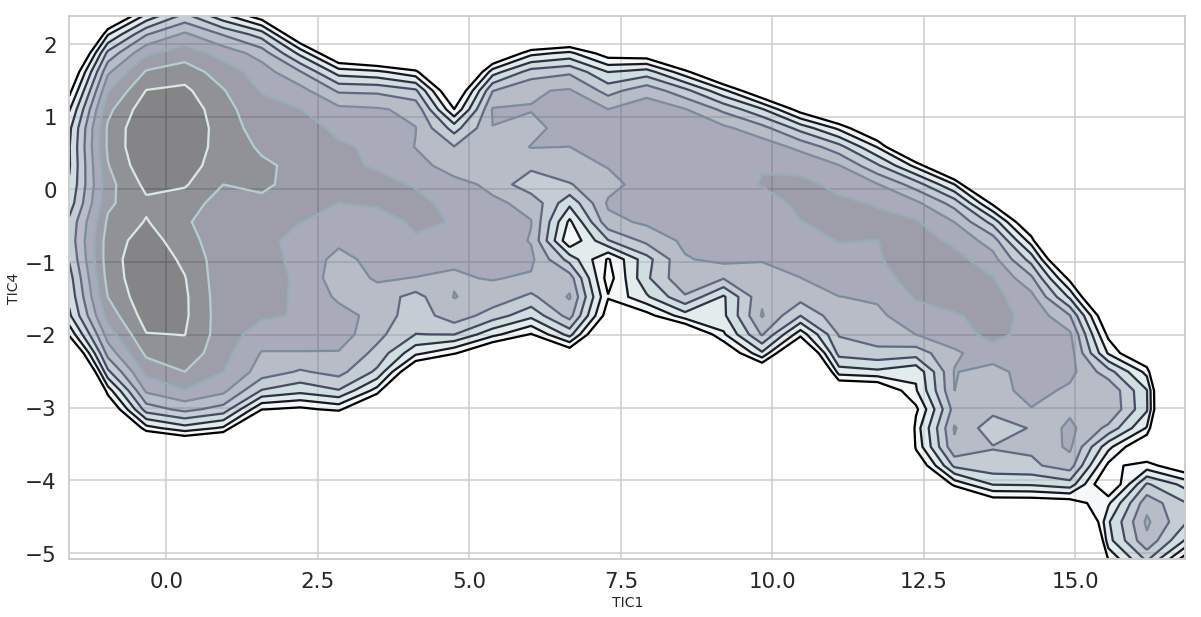

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
msme.plot_free_energy(txx, obs=(0, 3), n_samples=100000,
                      xlabel='TIC1', ylabel='TIC4')


Text(0, 0.5, 'Free Energy')

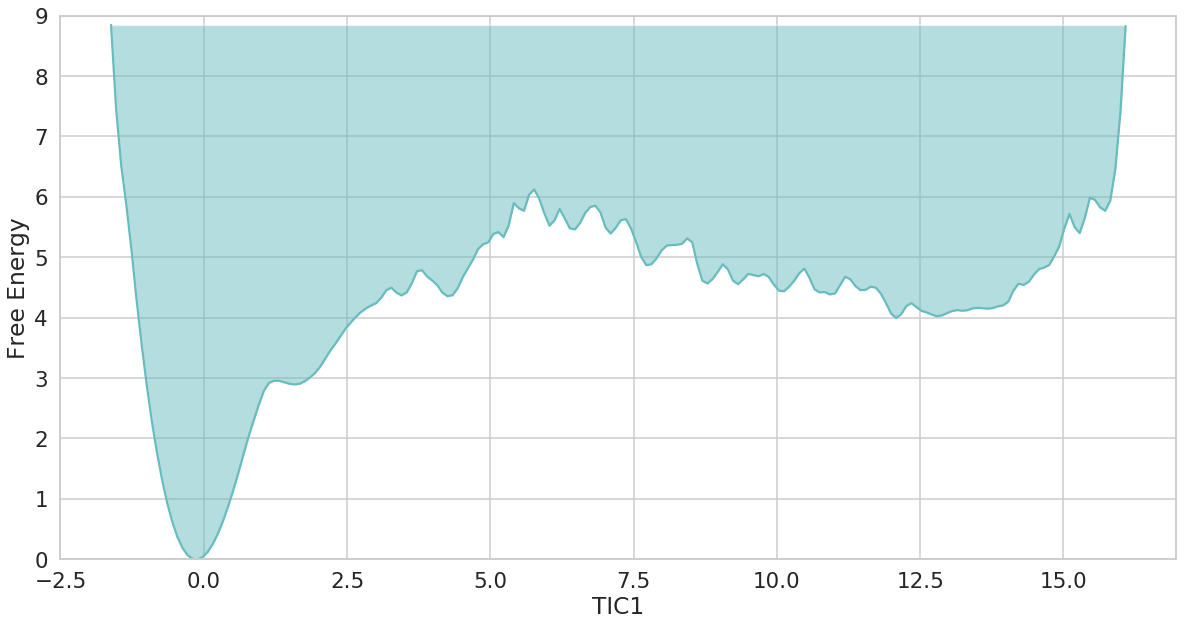

In [19]:
msme.plot_free_energy(txx, obs=(0), n_samples=100000,gridsize=200)
ylim([0,9])
xlabel("TIC1")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

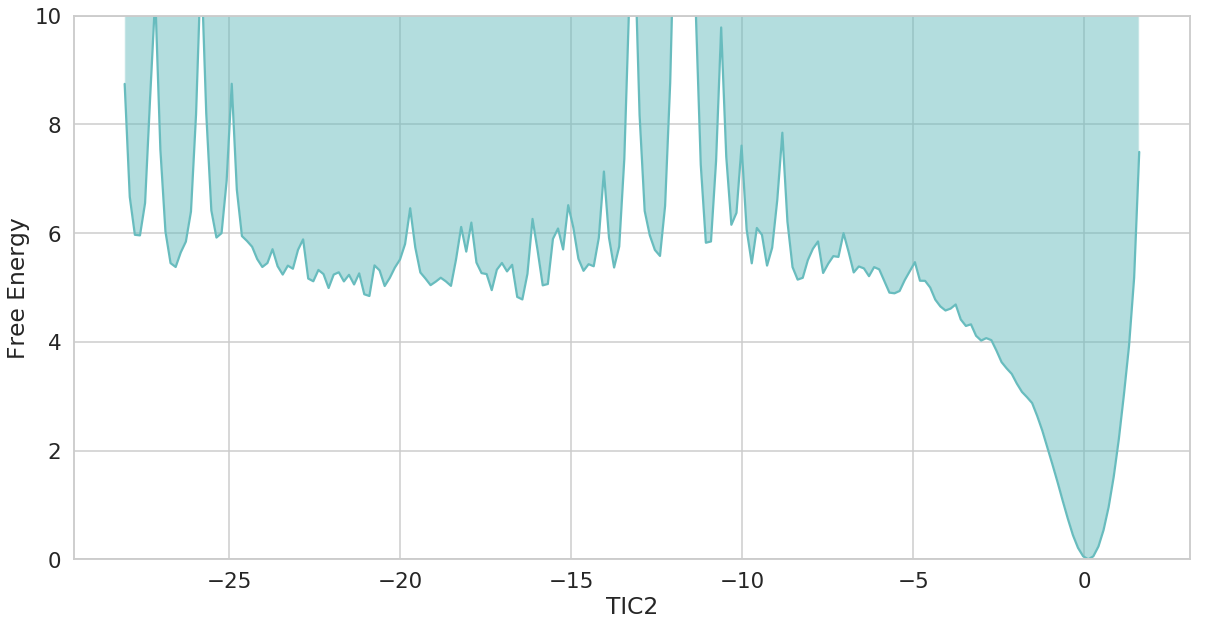

In [24]:
msme.plot_free_energy(txx, obs=(1), n_samples=100000,gridsize=200)
ylim([0,10])
xlabel("TIC2")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

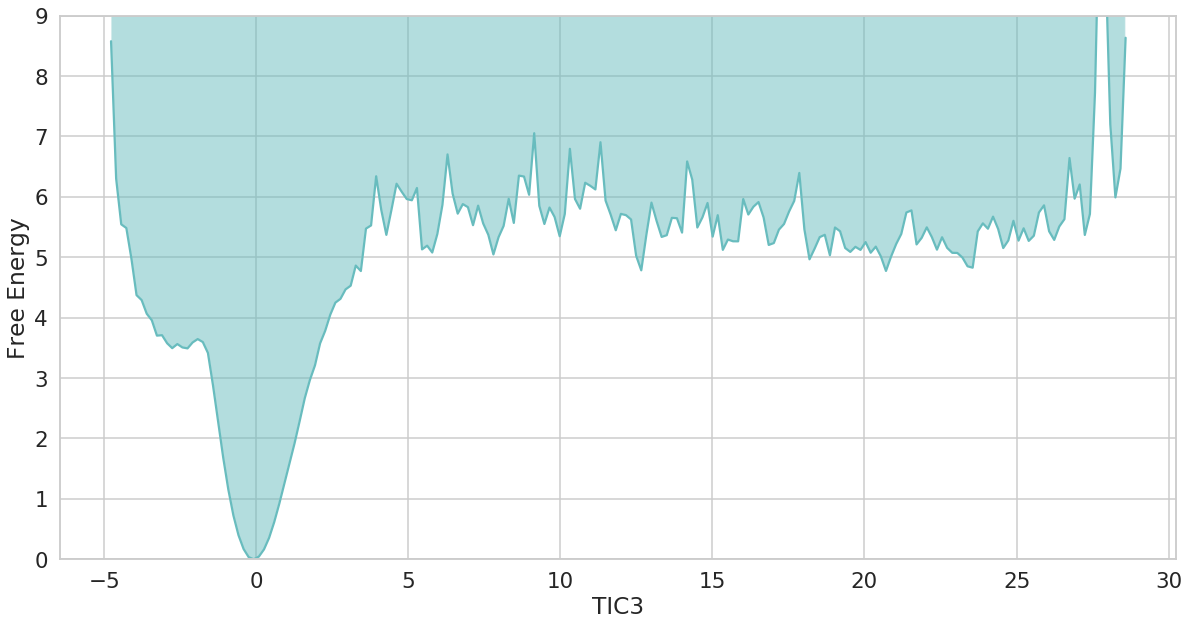

In [25]:
msme.plot_free_energy(txx, obs=(2), n_samples=100000,gridsize=200)
ylim([0,9])
xlabel("TIC3")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

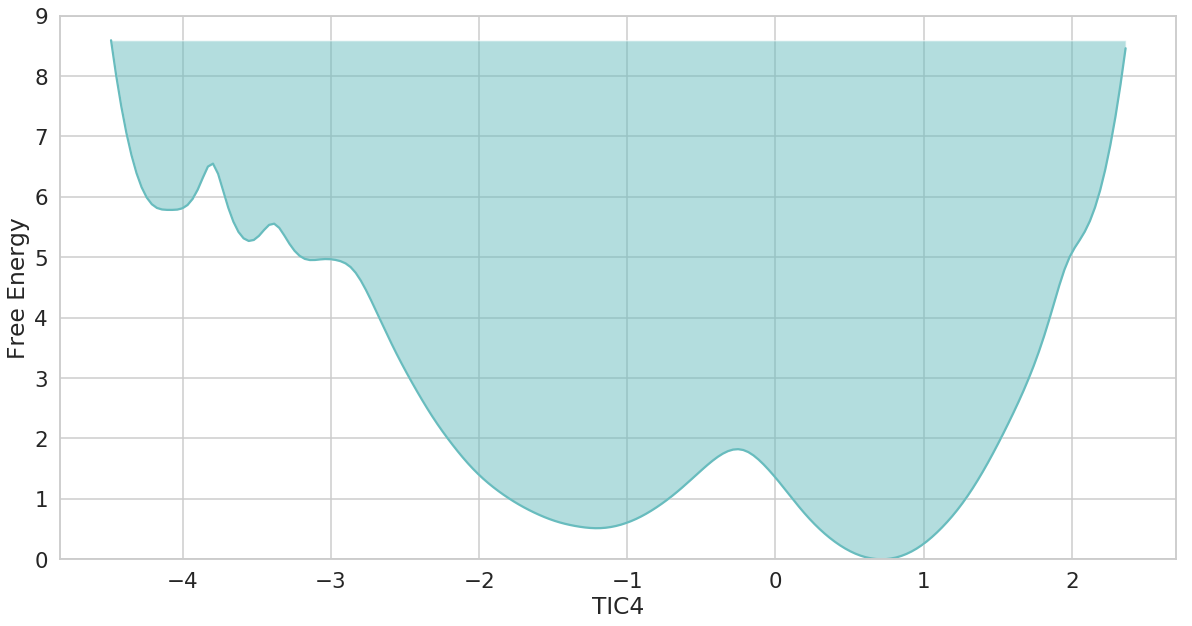

In [26]:
msme.plot_free_energy(txx, obs=(3), n_samples=100000,gridsize=200)
ylim([0,9])
xlabel("TIC4")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

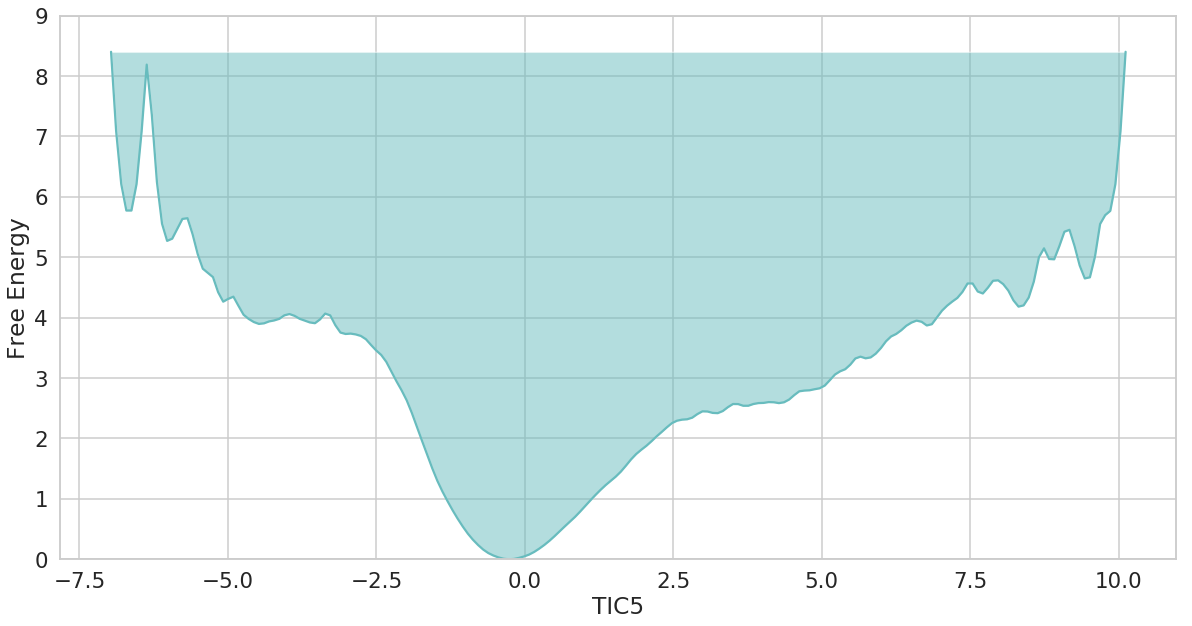

In [34]:
msme.plot_free_energy(txx, obs=(4), n_samples=100000,gridsize=200)
ylim([0,9])
xlabel("TIC5")
ylabel("Free Energy")